# Text Clustering Project - Exploratory Data Analysis

## Objectives
- Understand the dataset characteristics
- Analyze text length and complexity
- Explore text features
- Prepare insights for clustering

In [1]:
import sys
import os

# Add project source directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load the dataset
df = pd.read_csv('../data/people_wiki.csv')

# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nData Types:\n", df.dtypes)

Dataset Shape: (1000, 3)

Columns: ['URI', 'name', 'text']

Data Types:
 URI     object
name    object
text    object
dtype: object


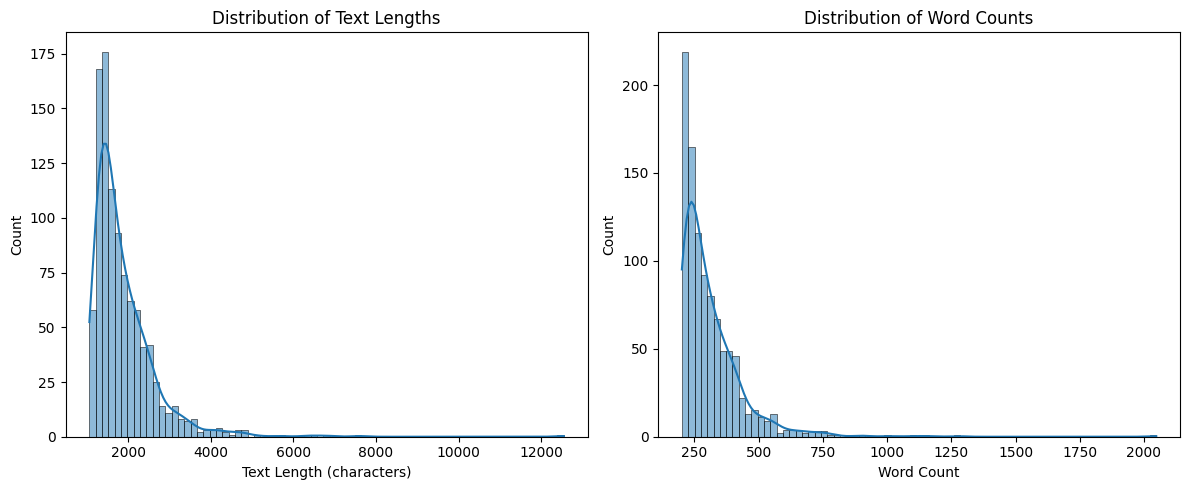


Text Length Statistics:
        text_length   word_count
count   1000.000000  1000.000000
mean    1882.411000   312.223000
std      803.152423   131.274896
min     1062.000000   201.000000
25%     1385.750000   229.000000
50%     1654.000000   274.500000
75%     2155.000000   353.000000
max    12546.000000  2048.000000


In [3]:
# Text length analysis
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')

plt.tight_layout()
plt.show()

# Text length summary statistics
print("\nText Length Statistics:")
print(df[['text_length', 'word_count']].describe())

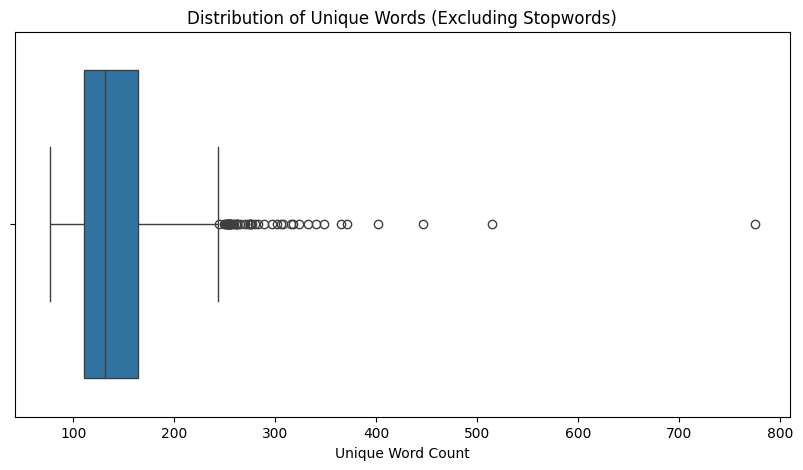


Unique Word Count Statistics:
count    1000.000000
mean      145.348000
std        52.391677
min        77.000000
25%       111.000000
50%       131.500000
75%       164.000000
max       775.000000
Name: unique_word_count, dtype: float64


In [4]:
# Unique words and vocabulary analysis
def get_unique_words(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(str(text).lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return set(words)

df['unique_words'] = df['text'].apply(get_unique_words)
df['unique_word_count'] = df['unique_words'].apply(len)

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['unique_word_count'])
plt.title('Distribution of Unique Words (Excluding Stopwords)')
plt.xlabel('Unique Word Count')
plt.show()

print("\nUnique Word Count Statistics:")
print(df['unique_word_count'].describe())

In [5]:
# Top N-grams analysis
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngram_matrix = vectorizer.fit_transform(texts)
    ngram_counts = np.sum(ngram_matrix, axis=0)
    ngram_freq = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_k]

# Bigrams analysis
print("Top 20 Bigrams:")
for bigram, count in get_top_ngrams(df['text'], n=2):
    print(f"{bigram}: {count}")

# Trigrams analysis
print("\nTop 20 Trigrams:")
for trigram, count in get_top_ngrams(df['text'], n=3):
    print(f"{trigram}: {count}")

Top 20 Bigrams:
new york: 339
united states: 205
high school: 116
major league: 84
new zealand: 81
best known: 77
los angeles: 75
york city: 71
state university: 69
san francisco: 67
football league: 55
hall fame: 55
hong kong: 52
prime minister: 50
league baseball: 47
washington dc: 43
york times: 42
world cup: 42
vice president: 39
air force: 39

Top 20 Trigrams:
new york city: 71
new york times: 42
major league baseball: 42
new york university: 14
national football league: 13
world war ii: 13
new york yankees: 13
united states senate: 12
harvard law school: 12
new south wales: 12
iaaf world cross: 12
world cross country: 12
cross country championships: 12
wall street journal: 11
woa recordswoa international: 11
australian football league: 10
rugby world cup: 10
american professional baseball: 10
university southern california: 10
american soccer league: 10


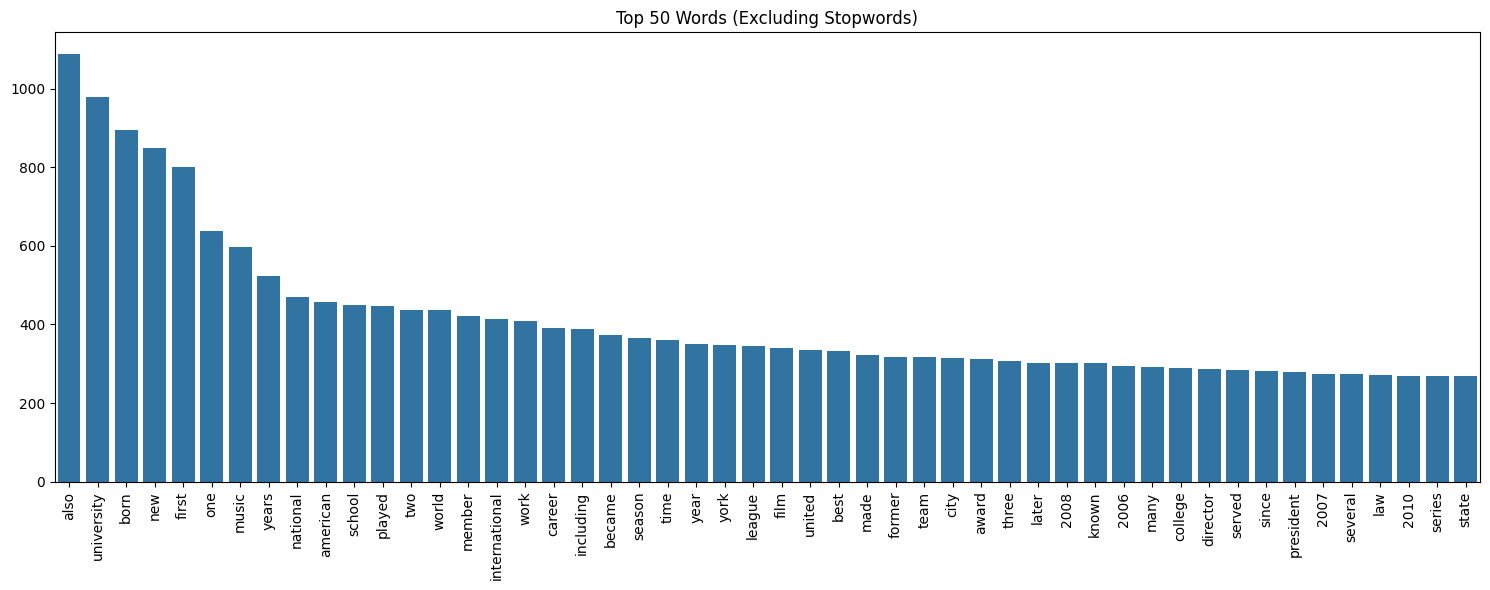

In [6]:
# Topic Hints through Word Frequency
from collections import Counter

def get_top_words(texts, top_k=50):
    stop_words = set(stopwords.words('english'))
    words = []
    for text in texts:
        tokens = word_tokenize(str(text).lower())
        words.extend([word for word in tokens if word.isalnum() and word not in stop_words])
    return Counter(words).most_common(top_k)

top_words = get_top_words(df['text'])

plt.figure(figsize=(15, 6))
words, counts = zip(*top_words)
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 50 Words (Excluding Stopwords)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Key EDA Insights

1. **Text Length**
   - Average text length (characters): {}
   - Average word count: {}

2. **Vocabulary**
   - Average unique word count: {}

3. **Top Bigrams**
   - Hint most common two-word phrases

4. **Potential Clustering Observations**
   - Text diversity suggests multiple potential clusters
   - Recommended initial cluster count: 3-5
   - Consider using SBERT or Word2Vec for embedding